In [1]:
import os
base_directory = "../afhq/train/cat"
all_image_urls = os.listdir(base_directory)
all_image_urls[:10]

['flickr_cat_000002.jpg',
 'flickr_cat_000003.jpg',
 'flickr_cat_000004.jpg',
 'flickr_cat_000005.jpg',
 'flickr_cat_000006.jpg',
 'flickr_cat_000007.jpg',
 'flickr_cat_000009.jpg',
 'flickr_cat_000010.jpg',
 'flickr_cat_000012.jpg',
 'flickr_cat_000013.jpg']

In [2]:
# 2. There's a lot of images (5k+) to fit in memory all at once, so let's just grab the first 500 for now
sample_image_urls = all_image_urls[:10]
sample_image_urls = list(map(lambda item: f"{base_directory}/{item}", sample_image_urls))
sample_image_urls

['../afhq/train/cat/flickr_cat_000002.jpg',
 '../afhq/train/cat/flickr_cat_000003.jpg',
 '../afhq/train/cat/flickr_cat_000004.jpg',
 '../afhq/train/cat/flickr_cat_000005.jpg',
 '../afhq/train/cat/flickr_cat_000006.jpg',
 '../afhq/train/cat/flickr_cat_000007.jpg',
 '../afhq/train/cat/flickr_cat_000009.jpg',
 '../afhq/train/cat/flickr_cat_000010.jpg',
 '../afhq/train/cat/flickr_cat_000012.jpg',
 '../afhq/train/cat/flickr_cat_000013.jpg']

In [3]:
# 3. Create a dataframe to store the image's metadata
from pandas import DataFrame
from PIL import Image
payloads = DataFrame.from_records({"image_url": sample_image_urls})
payloads ["type"] = "cat"
payloads

,image_url,type
0,../afhq/train/cat/flickr_cat_000002.jpg,cat
1,../afhq/train/cat/flickr_cat_000003.jpg,cat
2,../afhq/train/cat/flickr_cat_000004.jpg,cat
3,../afhq/train/cat/flickr_cat_000005.jpg,cat
4,../afhq/train/cat/flickr_cat_000006.jpg,cat
5,../afhq/train/cat/flickr_cat_000007.jpg,cat
6,../afhq/train/cat/flickr_cat_000009.jpg,cat
7,../afhq/train/cat/flickr_cat_000010.jpg,cat
8,../afhq/train/cat/flickr_cat_000012.jpg,cat
9,../afhq/train/cat/flickr_cat_000013.jpg,cat


In [4]:
Image.open(payloads['image_url'][56])

KeyError: 56

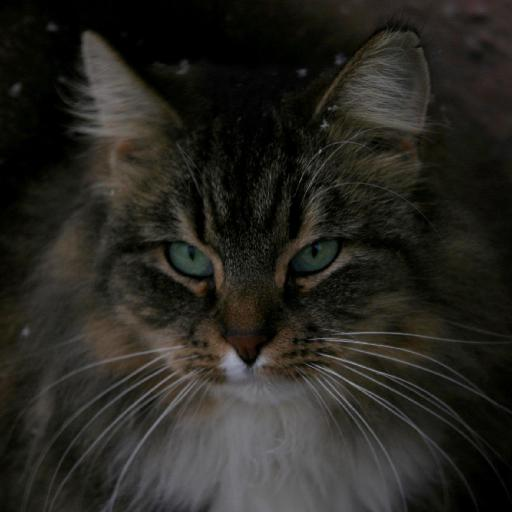

In [ ]:
Image.open(payloads['image_url'][0])

In [5]:
# 4. Create PIL images from each of the local URLs that we created in the last step
images = list(map(lambda el: Image.open(el), payloads["image_url"]))
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>]

In [6]:
# 5. Create base64 string representations to store alongside
# the metadata. This will allow us to preview the images on our app
from io import BytesIO
import math
import base64

target_width = 256

def resize_image(image_url):
    pil_image = Image.open(image_url)
    image_aspect_ratio= pil_image.width / pil_image.height
    resized_pil_image = pil_image.resize([target_width, math.floor(target_width * image_aspect_ratio)])
    return resized_pil_image


def convert_image_to_base64(pil_image):
    image_data = BytesIO()
    pil_image.save(image_data, format="JPEG")
    base64_string = base64.b64encode(image_data.getvalue()).decode("utf-8")
    return base64_string

resized_images = list(map(lambda el: resize_image(el), sample_image_urls))
base64_strings = list(map(lambda el: convert_image_to_base64(el), resized_images))
payloads["base64"] = base64_strings
payloads

,image_url,type,base64
0,../afhq/train/cat/flickr_cat_000002.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,../afhq/train/cat/flickr_cat_000003.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,../afhq/train/cat/flickr_cat_000004.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,../afhq/train/cat/flickr_cat_000005.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,../afhq/train/cat/flickr_cat_000006.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5,../afhq/train/cat/flickr_cat_000007.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
6,../afhq/train/cat/flickr_cat_000009.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
7,../afhq/train/cat/flickr_cat_000010.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
8,../afhq/train/cat/flickr_cat_000012.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
9,../afhq/train/cat/flickr_cat_000013.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


### pip install protobuf==3.20.0

In [8]:
# 6. Import the model and the tokenizer, then run all of the images through it to create the embeddings
import torch
from transformers import AutoImageProcessor, ResNetForImageClassification
from tqdm import tqdm
# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50").to(device)

# Process images in batches
batch_size = 16
embeddings_list = []
num_images = len(images)
batch_range = range(0, num_images, batch_size)

# Initialize tqdm with the total number of batches
for i in tqdm(batch_range, desc="Processing Batches", total=len(batch_range)):
    batch_images = images[i:i+batch_size]
    batch_inputs = processor(batch_images, return_tensors="pt").to(device)
    batch_outputs = model(**batch_inputs)
    batch_embeddings = batch_outputs.logits
    embeddings_list.append(batch_embeddings)

# Concatenate or aggregate embeddings from different batches
# Concatenate tensors along dimension 0
embeddings = torch.cat(embeddings_list, dim=0)
# Print embeddings
print(embeddings)

c:\Users\omarg\anaconda3\envs\Pety_Chatbot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Processing Batches: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

tensor([[ -9.6384,  -9.4248, -10.2445,  ..., -10.0642,  -7.8933,  -7.9062],
        [-10.3439, -10.4525,  -9.0364,  ..., -10.2297,  -7.2062,  -8.6609],
        [ -9.8389, -10.0796,  -9.1028,  ...,  -9.8351,  -6.7354,  -8.7482],
        ...,
        [ -8.3480,  -9.3031,  -8.5439,  ...,  -9.3221,  -8.2426,  -8.1931],
        [-10.0413,  -9.9858, -10.4634,  ...,  -9.1402,  -8.9437,  -9.0488],
        [ -9.3533, -10.2362, -10.1019,  ...,  -9.7962,  -9.8447,  -8.9383]],
       device='cuda:0', grad_fn=<CatBackward0>)


In [9]:
#embeddings_cpu = embeddings.cpu()

In [10]:
#embeddings_cpu

In [11]:
# 7. Store the length of the embedding. We'll need
# this later
embedding_length = len(embeddings[0])
print('embedding_length:',embedding_length)
print('embedding_shape:',embeddings.shape)

embedding_length: 1000
embedding_shape: torch.Size([100, 1000])


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# 8.5 Jump over to Qdrant and create a new Cloud account
# You'll need a Cluster URL and an API key to continue.

In [7]:
# 9. Intialize the Qdrant client using the environment
#variables that were just loaded
from qdrant_client import QdrantClient
import os

qclient = QdrantClient(
    url = os.getenv('QDRANT_DB_URL'),
    api_key = os.getenv('QDRANT_API_KEY'),
)
qclient

In [8]:
collection_name = "Egypt-dakh-talkha"

In [16]:
'''
# 10. Create (or-create) a collection called "animal_images".
# This is the collection that our vectors and metadata will be stored in.
from qdrant_client.models import VectorParams, Distance

collection = qclient.recreate_collection(
    collection_name= collection_name,
    vectors_config= VectorParams(
        size = embedding_length,
        distance = Distance.COSINE
    )
)
collection
'''

True

In [14]:
payloads

,image_url,type,base64
0,../afhq/train/cat/flickr_cat_000002.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,../afhq/train/cat/flickr_cat_000003.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,../afhq/train/cat/flickr_cat_000004.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,../afhq/train/cat/flickr_cat_000005.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,../afhq/train/cat/flickr_cat_000006.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...
95,../afhq/train/cat/flickr_cat_000104.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
96,../afhq/train/cat/flickr_cat_000105.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
97,../afhq/train/cat/flickr_cat_000106.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
98,../afhq/train/cat/flickr_cat_000107.jpg,cat,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [9]:
# 11. The metadata must be uploaded as an array of objects, so
# convert the dataframe to an array of objects before continuing
payload_dicts = payloads.to_dict(
    orient="records"
)
#payload_dicts

In [10]:
payload_dicts

[{'image_url': '../afhq/train/cat/flickr_cat_000002.jpg',
  'type': 'cat',
  'base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwMJ+dKq9aeEJOM04NsUgDNTcCuRzTamHzOOgyanu7RIFVklVs+lNAUqWgjBxUnkyFN+xivrimBHSUvSko

In [18]:
# 12. Create the record.This is the payload (metadata) and the 
# vectore (embedding) side-by-side. Because we have two arrays
# of data that share the same index, we can just enumerate over
# one of those arrays and use the index to create the record.
from qdrant_client import models

records = [
    models.Record(
        id = idx,
        payload = payload_dicts[idx],
        vector = embeddings[idx]
    )
    for idx,_ in enumerate(payload_dicts)
]

In [20]:
len(records)

100

In [2]:
embeddings[0]

NameError: name 'embeddings' is not defined

In [19]:
records[0]

Record(id=0, payload={'image_url': '../afhq/train/cat/flickr_cat_000002.jpg', 'type': 'cat', 'base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwMJ+dKq9aeEJOM04NsUgDNTcCuRzTamHzOOgyanu7RIFVklVs+lNAUqWgjBxUnkyF

In [22]:
records[0].vector[0]

-9.638439178466797

In [24]:
# 13. Upload all the records to our collection
for i in range(0,100,25):
    #qclient.upload_records(
    qclient.upload_points(
        collection_name=collection_name,
        points=records[i:i+25],
    )

# trash



In [14]:
# 10. Create (or-create) a collection called "animal_images".
# This is the collection that our vectors and metadata will be stored in.
from qdrant_client.models import VectorParams, Distance

collection_name = "test"
collection = qclient.recreate_collection(
    collection_name= collection_name,
    vectors_config= VectorParams(
        size = 1000,
        distance = Distance.COSINE
    )
)
collection

True

In [6]:
qclient.search?

Signature:
qclient.search(
    collection_name: str,
    query_vector: Union[numpy.ndarray[Any, numpy.dtype[Union[numpy.bool_, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]]], Sequence[float], Tuple[str, List[float]], qdrant_client.http.models.models.NamedVector, qdrant_client.http.models.models.NamedSparseVector],
    query_filter: Union[qdrant_client.http.models.models.Filter, points_pb2.Filter, NoneType] = None,
    search_params: Union[qdrant_client.http.models.models.SearchParams, points_pb2.SearchParams, NoneType] = None,
    limit: int = 10,
    offset: Optional[int] = None,
    with_payload: Union[bool, Sequence[str], qdrant_client.http.models.models.PayloadSelectorInclude, qdrant_client.http.models.models.PayloadSelectorExclude, points_pb2.WithPayloadSelector] = True,
    with_vectors: Union[bool, Sequence[str]] = False,
    score_threshold: Optional[float

In [5]:
from qdrant_client.models import Filter, FieldCondition, Range, Match

qclient.search(collection_name="Egypt-dakh-talkha",
                query_filter=Filter(
                must=[
                    FieldCondition(
                        key='petID',
                        range=Match(
                            value="4:17:2024:10:14:43:1354"
                        )
                    )
                ]
                )
            )

TypeError: search() missing 1 required positional argument: 'query_vector'

In [52]:
# msh sh8ala
qclient.delete_payload_index(
    collection_name= collection_name,
    field_name = 'Vectors')

UpdateResult(operation_id=13, status=<UpdateStatus.COMPLETED: 'completed'>)

In [29]:
qclient.count(
    collection_name = collection_name,
    ).count

100

In [ ]:
import sys
dict_size_in_bytes = sys.getsizeof(records)

# Now 'dict_size_in_bytes' contains the size of the dictionary in bytes
print("Size of the dictionary in memory (in bytes):", dict_size_in_bytes)

Size of the dictionary in memory (in bytes): 920


In [ ]:
k = 10  # Change this to the desired number of similar vectors

# Search for nearest neighbors based on cosine similarity
neighbors = collection.get_nearest_neighbors(your_vector, k=k)

In [46]:
embeddings[0].size()

torch.Size([1000])

In [2]:
import pickle
with open(r'../model/embeddings.pkl', 'rb') as f:
        data = pickle.load(f)

In [55]:
def find_nearest(qclient, vector, limit=3):
        return qclient.search(collection_name='animal_images' ,query_vector=vector, limit=limit, with_payload=True, score_threshold=0.8)


In [3]:
data[0]

tensor([ -9.7743, -10.4467, -10.0383, -10.1515, -11.7100,  -8.3249, -10.7250,
        -10.9625,  -9.2226, -11.1884,  -8.7532, -11.2779, -10.4156,  -9.9289,
        -11.4722, -11.2884,  -9.9276, -11.0735,  -9.3810, -10.4831,  -9.4776,
        -10.4104, -10.8259,  -9.7600, -10.7667, -11.2059,  -9.5694, -11.2336,
         -9.9059, -10.1945, -10.1854,  -9.9410, -10.1099, -10.2137,  -9.1322,
        -11.4569,  -9.0161, -10.2755,  -7.9880, -10.3789, -10.9656,  -9.4364,
         -9.5648, -10.2113, -11.2226,  -9.1105, -10.7171,  -9.2814, -10.9044,
        -10.9569, -11.0383,  -9.1066,  -9.4679, -10.8994,  -9.7143, -10.7203,
        -10.8555, -12.4244, -10.2952, -10.1267,  -8.5044,  -9.3174,  -8.9535,
        -10.2300, -10.4271, -10.5392,  -7.0898, -10.9582,  -8.9311, -10.7164,
        -12.7970,  -9.4544, -12.3405, -10.5137, -13.0241, -12.1068, -11.3774,
        -10.5232,  -9.0225,  -9.4600,  -8.8897,  -8.6537,  -9.7792,  -9.2638,
        -10.9926,  -9.7951, -10.3043, -10.6229, -10.2834, -11.61

In [56]:
find_nearest(qclient, data[0])

[ScoredPoint(id=23, version=44, score=0.9962143, payload={'base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDyrbQBTjSY71B7IlNNPxSYoAbQKcKPwpgNzRSnikzmkAGkoxRTELj2pKWikAlJilopgJikPApcYo6CgBBS0g5p2OKAE604UlFACd6

In [53]:
out = qclient.search(collection_name='animal_images', query_vector= data[0], limit = 3, with_payload = True, score_threshold = 0.8)
print(len(out))


3


In [43]:
out

[ScoredPoint(id=0, version=11, score=1.0, payload={'base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwMJ+dKq9aeEJOM04NsUgDNTcCuRzTamHzOOgyanu7RIFVklVs+lNAUqWgjBxUnkyFN+xivrimBHSUvSkoAKKKKADNLSUUAODUuec0ylzzQB

In [24]:
# to delete using filter (try it)
condition = {"cat-id": "my_key", "operator": "==", "value": "specific_value"}

# Search for matching IDs
matching_ids = collection.search(filters=[condition])["hits"]

# Delete records by ID (if any matches were found)
if matching_ids:
    for point_id in matching_ids:
        collection.delete_points([point_id])
    print("Deleted", len(matching_ids), "records.")
else:
    print("No records found matching the condition.")

Signature:
qclient.search(
    collection_name: str,
    query_vector: Union[numpy.ndarray[Any, numpy.dtype[Union[numpy.bool_, numpy.int8, numpy.int16, numpy.int32, numpy.int64, numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64, numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]]], Sequence[float], Tuple[str, List[float]], qdrant_client.http.models.models.NamedVector, qdrant_client.http.models.models.NamedSparseVector],
    query_filter: Union[qdrant_client.http.models.models.Filter, points_pb2.Filter, NoneType] = None,
    search_params: Union[qdrant_client.http.models.models.SearchParams, points_pb2.SearchParams, NoneType] = None,
    limit: int = 10,
    offset: Optional[int] = None,
    with_payload: Union[bool, Sequence[str], qdrant_client.http.models.models.PayloadSelectorInclude, qdrant_client.http.models.models.PayloadSelectorExclude, points_pb2.WithPayloadSelector] = True,
    with_vectors: Union[bool, Sequence[str]] = False,
    score_threshold: Optional[float

In [32]:
print(len(records[0].payload['base64']))

11856


In [34]:
records[0].payload.keys()

AttributeError: 'Record' object has no attribute 'keys'